In [231]:
from google.colab.patches import cv2_imshow

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [233]:
house_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house.csv')
house_df

,Unnamed: 0,datesold,price,bedrooms
0,0,2007-02-07,525000,4
1,1,2007-02-27,290000,3
2,2,2007-03-07,328000,3
3,3,2007-03-09,380000,4
4,4,2007-03-21,310000,3
...,...,...,...,...
29575,29575,2019-07-25,500000,3
29576,29576,2019-07-25,560000,2
29577,29577,2019-07-26,464950,2
29578,29578,2019-07-26,589000,2


In [234]:
del(house_df['Unnamed: 0'])
house_df

,datesold,price,bedrooms
0,2007-02-07,525000,4
1,2007-02-27,290000,3
2,2007-03-07,328000,3
3,2007-03-09,380000,4
4,2007-03-21,310000,3
...,...,...,...
29575,2019-07-25,500000,3
29576,2019-07-25,560000,2
29577,2019-07-26,464950,2
29578,2019-07-26,589000,2


In [235]:
house_df = house_df[house_df['bedrooms']==4]
del(house_df['bedrooms'])
house_df['datesold'] = pd.to_datetime(house_df['datesold'])
house_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datesold,price
0,2007-02-07,525000
3,2007-03-09,380000
5,2007-04-04,465000
7,2007-04-30,1530000
12,2007-06-27,850000
...,...,...
28188,2017-12-13,680000
28304,2018-02-05,535000
28424,2018-03-13,645000
28772,2018-07-04,300000


In [236]:
house_train_df = house_df.iloc[:8000]
len(house_train_df)

8000

In [237]:
house_train_df.set_index('datesold', inplace=True)
house_train_df

,price
datesold,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000
...,...
2017-07-24,1950000
2017-07-25,600000
2017-07-25,651000


In [238]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [239]:
house_train_df.values

array([[525000],
       [380000],
       [465000],
       ...,
       [651000],
       [665000],
       [765000]])

In [240]:
model = ARIMA(house_train_df.values, order=(2, 1, 2))
model

In [241]:
model_fit = model.fit(trend='c',full_output=True, disp=True)
model_fit

In [242]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 7999
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -110876.772
Method:                       css-mle   S.D. of innovations         253240.003
Date:                Fri, 10 Dec 2021   AIC                         221765.543
Time:                        06:44:11   BIC                         221807.465
Sample:                             1   HQIC                        221779.892
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2589     10.356      3.211      0.001      12.961      53.557
ar.L1.D.y      0.7287      0.175      4.170      0.000       0.386       1.071
ar.L2.D.y     -0.0838      0.037     -2.267      0.023      -0.156      -0.011
ma.L1.D.y     -1.5411      0.174     -8.856      0.000      -1.882      -1.200
ma.L2.D.y      0.5424      0.173      3.126      0.002       0.202       0.882
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7074           +0.0000j            1.7074            0.0000
AR.2            6.9928           +0.0000j            6.9928            0.0000
MA.1            1.0027           +0.0000j            1.0027            0.0000
MA.2            1.8388           +0.0000j            1.8388            0.0000
-----------------------------------------------------------------------------
"""

In [243]:
forecast_data = model_fit.forecast(steps=2400)
forecast_data

(array([819450.22426099, 829154.67961032, 831677.49129916, ...,
        913573.12164217, 913606.38052866, 913639.63941516]),
 array([253240.00336137, 257655.60472029, 258020.19073434, ...,
        261697.31708598, 261698.79072363, 261700.26435298]),
 array([[ 323108.9382279 , 1315791.51029408],
        [ 324158.97394367, 1334150.38527697],
        [ 325967.21017569, 1337387.77242263],
        ...,
        [ 400655.8053029 , 1426490.43798144],
        [ 400686.17591267, 1426526.58514466],
        [ 400716.5465387 , 1426562.73229162]]))

In [244]:
house_test_df = house_df[8000:]
house_test_df

,datesold,price
18917,2017-07-25,849000
18918,2017-07-25,1080000
18923,2017-07-26,880000
18930,2017-07-27,580000
18931,2017-07-27,670000
...,...,...
28188,2017-12-13,680000
28304,2018-02-05,535000
28424,2018-03-13,645000
28772,2018-07-04,300000


In [245]:
pred_y = forecast_data[0]
pred_y

array([819450.22426099, 829154.67961032, 831677.49129916, ...,
       913573.12164217, 913606.38052866, 913639.63941516])

In [246]:
pred_y = pred_y.tolist()
pred_y

[819450.2242609878,
 829154.6796103178,
 831677.4912991641,
 832714.8354439038,
 833271.2420187204,
 833601.6126814911,
 833807.5556868345,
 833941.7619876892,
 834034.1163975367,
 834101.9823465019,
 834155.5092713442,
 834200.6386217079,
 834240.8497658655,
 834278.180434796,
 834313.8240742747,
 834348.4796579912,
 834382.5565592567,
 834416.2945389713,
 834449.8340198051,
 834483.2572442202,
 834516.6123798138,
 834549.9276372854,
 834583.2195390202,
 834616.4977618146,
 834649.7679731554,
 834683.0334923642,
 834716.2962634949,
 834749.5574251367,
 834782.8176441364,
 834816.0773110513,
 834849.3366546225,
 834882.5958088182,
 834915.854852101,
 834949.1138304244,
 834982.3727707026,
 835015.6316886985,
 835048.8905936443,
 835082.1494909469,
 835115.4083837729,
 835148.6672739773,
 835181.9261626462,
 835215.1850504157,
 835248.4439376584,
 835281.7028245927,
 835314.9617113463,
 835348.220597994,
 835381.4794845799,
 835414.7383711294,
 835447.9972576577,
 835481.2561441736,
 83

In [247]:
test_y = house_test_df.price.values.tolist()
test_y

[849000,
 1080000,
 880000,
 580000,
 670000,
 710000,
 570000,
 630000,
 702500,
 752000,
 865000,
 865000,
 1249000,
 1685000,
 606000,
 760000,
 765000,
 970000,
 995000,
 1150000,
 431000,
 630000,
 657000,
 741000,
 585000,
 661450,
 1150000,
 735000,
 760000,
 785000,
 580000,
 620000,
 640000,
 680001,
 692500,
 638000,
 680000,
 681000,
 685000,
 730000,
 780000,
 900000,
 925000,
 1075000,
 800000,
 740000,
 780000,
 1030000,
 1232500,
 665000,
 793888,
 960000,
 1030000,
 513000,
 710000,
 997500,
 600000,
 605000,
 710000,
 740000,
 555000,
 660000,
 739000,
 890000,
 1310000,
 571000,
 640000,
 705000,
 727000,
 745000,
 745000,
 779000,
 600000,
 690000,
 701500,
 740000,
 825000,
 855000,
 1260000,
 669000,
 1050000,
 636000,
 750500,
 585000,
 665500,
 698000,
 720000,
 725000,
 740000,
 760000,
 765000,
 857000,
 900000,
 740000,
 1275000,
 596000,
 652000,
 670000,
 725000,
 595000,
 695000,
 850000,
 1060000,
 706000,
 880000,
 580000,
 650000,
 720000,
 820000,
 6200

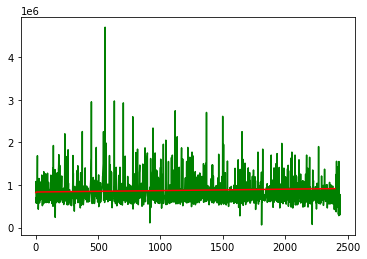

In [248]:
plt.plot(test_y,color='green')
plt.plot(pred_y,color='red')

In [249]:
from fbprophet import Prophet

In [250]:
house_df = house_df.rename(columns={'datesold':'ds','price':'y'})
house_df

,ds,y
0,2007-02-07,525000
3,2007-03-09,380000
5,2007-04-04,465000
7,2007-04-30,1530000
12,2007-06-27,850000
...,...,...
28188,2017-12-13,680000
28304,2018-02-05,535000
28424,2018-03-13,645000
28772,2018-07-04,300000


In [251]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

In [252]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10442 entries, 0 to 29421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10442 non-null  datetime64[ns]
 1   y       10442 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 244.7 KB


In [253]:
prophet.fit(house_df)

In [262]:
# perioids = 3, freq='d' 는 3일치 데이터를 예측해서 df에 붙인다는 뜻
future_data = prophet.make_future_dataframe(periods=3,freq='d')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2007-02-07,463646.299977,296848.101041,9.640215e+05,463646.299977,463646.299977,0.4572,0.4572,0.4572,0.361679,0.361679,0.361679,-0.081796,-0.081796,-0.081796,-0.013726,-0.013726,-0.013726,0.0,0.0,0.0,631337.277133
1,2007-03-09,460449.066660,319993.076055,9.949547e+05,460449.066660,460449.066660,0.4572,0.4572,0.4572,0.430320,0.430320,0.430320,-0.057117,-0.057117,-0.057117,0.030237,0.030237,0.030237,0.0,0.0,0.0,658589.464038
2,2007-04-04,457678.131119,356687.346432,9.996097e+05,457678.131119,457678.131119,0.4572,0.4572,0.4572,0.469535,0.469535,0.469535,-0.081796,-0.081796,-0.081796,0.094131,0.094131,0.094131,0.0,0.0,0.0,672574.109049
3,2007-04-30,454907.195578,334423.843694,9.927468e+05,454907.195578,454907.195578,0.4572,0.4572,0.4572,0.445384,0.445384,0.445384,-0.027289,-0.027289,-0.027289,0.015473,0.015473,0.015473,0.0,0.0,0.0,657515.662264
4,2007-06-27,448725.877832,257183.750451,9.038985e+05,448725.877832,448725.877832,0.4572,0.4572,0.4572,0.318888,0.318888,0.318888,-0.081796,-0.081796,-0.081796,-0.056517,-0.056517,-0.056517,0.0,0.0,0.0,591819.070230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,2019-07-26,540650.268270,448642.702571,1.109481e+06,540650.268270,540650.268270,0.4572,0.4572,0.4572,0.420580,0.420580,0.420580,-0.057117,-0.057117,-0.057117,0.020497,0.020497,0.020497,0.0,0.0,0.0,768036.756964
3058,2019-07-27,540590.314910,541233.135829,1.200976e+06,540590.314910,540590.314910,0.4572,0.4572,0.4572,0.621769,0.621769,0.621769,0.144783,0.144783,0.144783,0.019785,0.019785,0.019785,0.0,0.0,0.0,876712.471351
3059,2019-07-28,540530.361550,594042.919700,1.227828e+06,540530.361550,540530.361550,0.4572,0.4572,0.4572,0.659449,0.659449,0.659449,0.184310,0.184310,0.184310,0.017939,0.017939,0.017939,0.0,0.0,0.0,896982.530613
3060,2019-07-29,540470.408190,456207.036429,1.088167e+06,540470.408190,540470.408190,0.4572,0.4572,0.4572,0.444917,0.444917,0.444917,-0.027289,-0.027289,-0.027289,0.015006,0.015006,0.015006,0.0,0.0,0.0,780934.990904


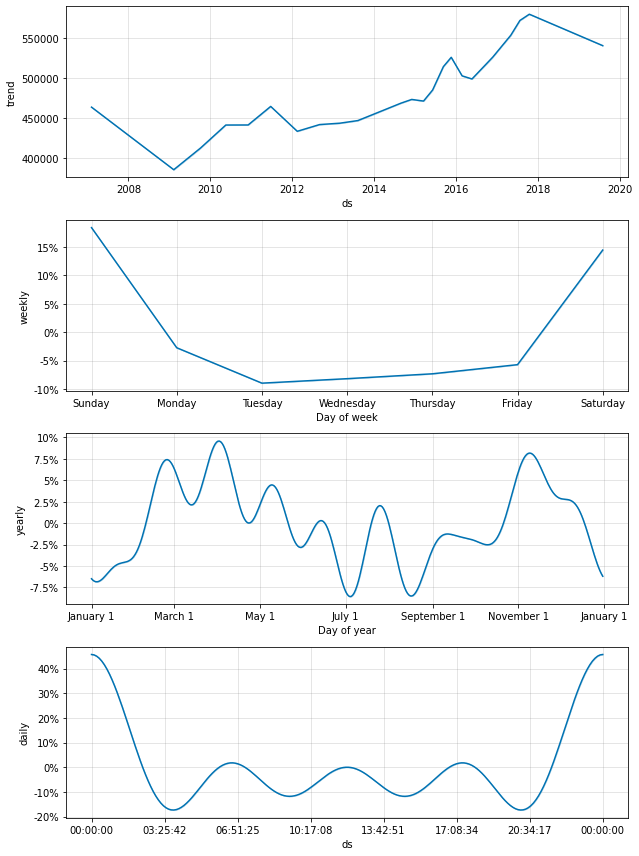

In [263]:
fig2 = prophet.plot_components(forecast_data)